# Práctica 03: Regresión con Árboles de Decisión

- **Título**: Regresión con Árboles de Decisión  
- **Profesor**: Daniel Jiménez Alcantar  
- **Equipo**: Israel Daniel Arturo Cano Portugal
- **Fecha**: 2025-10-16  



## 1. Introducción
El análisis de la demanda de servicios de salud mental en México requiere modelos predictivos que permitan anticipar la evolución de la carga asistencial. Este proyecto utiliza datos históricos publicados por INEGI (2010–2024) sobre consultas por trastornos mentales, desglosadas por entidad federativa, grupo de edad y sexo. A diferencia del dataset original de CONASAMA (solo 2024), este conjunto permite modelar una serie de tiempo real mediante regresión con árboles de decisión. Los modelos seleccionados —Árbol de Decisión Simple, Random Forest, Gradient Boosting, Extra Trees y AdaBoost Regressor— son adecuados para capturar relaciones no lineales entre variables categóricas y la demanda observada.


## 2. Problemática
La política pública en salud mental carece de herramientas cuantitativas para proyectar la demanda futura de servicios. Sin un modelo predictivo basado en datos históricos, las decisiones sobre asignación de recursos se toman con base en tablas estáticas o supuestos cualitativos. El dataset disponible contiene registros anuales desde 2010 hasta 2024, lo que permite construir un modelo de regresión que prediga la demanda en función de características demográficas y temporales. La ausencia de esta capacidad predictive representa un riesgo de subestimación de necesidades en entidades y grupos de alta vulnerabilidad.


## 3. Metodología

**Carga y limpieza del dataset:**

In [83]:
#leer data
import pandas as pd

df=pd.read_excel("Mental_06.xlsx", header=[6])

In [84]:
display(df)

,Entidad federativa,Grupos quinquenales de edad,2010,2010.1,2010.2,2010.3,2011,2011.1,2011.2,2011.3,...,2022.2,2022.3,2023,2023.1,2023.2,2023.3,2024,2024.1,2024.2,2024.3
0,Entidad federativa,Grupos quinquenales de edad,Total,Hombres,Mujeres,No especificado,Total,Hombres,Mujeres,No especificado,...,Mujeres,No especificado,Total,Hombres,Mujeres,No especificado,Total,Hombres,Mujeres,No especificado
1,Total nacional,Total,5012,4091,921,0,5718,4621,1095,2,...,1529,3,9072,7310,1760,2,9000,7266,1731,3
2,Total nacional,5 a 9 años,0,0,0,0,0,0,0,0,...,2,0,1,1,0,0,1,1,0,0
3,Total nacional,10 a 14 años,187,111,76,0,249,141,108,0,...,122,0,217,114,103,0,230,96,134,0
4,Total nacional,15 a 19 años,685,475,210,0,859,600,259,0,...,277,0,953,626,327,0,887,569,318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,La información corresponde a los suicidios reg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,"Los datos de 2024 son preliminares, debido a q...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df=df.dropna()
#quitar de entidad federativa los que son "Total nacional"
df = df[df['Entidad federativa'] != 'Total nacional']

In [86]:
#quitar columna 2022, 2023, 2024
df=df.drop(columns=['2022', '2023', '2024'])

In [89]:
#Renombrar columnas
df = df.rename(columns={'2010.1': 'Hombres 2010', '2010.2': 'Mujeres 2010', '2010.3': 'S/E 2010',
                        '2011.1': 'Hombres 2011', '2011.2': 'Mujeres 2011', '2011.3': 'S/E 2011',
                        '2012.1': 'Hombres 2012', '2012.2': 'Mujeres 2012', '2012.3': 'S/E 2012',
                        '2013.1': 'Hombres 2013', '2013.2': 'Mujeres 2013', '2013.3': 'S/E 2013',
                        '2014.1': 'Hombres 2014', '2014.2': 'Mujeres 2014', '2014.3': 'S/E 2014',
                        '2015.1': 'Hombres 2015', '2015.2': 'Mujeres 2015', '2015.3': 'S/E 2015',
                        '2016.1': 'Hombres 2016', '2016.2': 'Mujeres 2016', '2016.3': 'S/E 2016',
                        '2017.1': 'Hombres 2017', '2017.2': 'Mujeres 2017', '2017.3': 'S/E 2017',
                        '2018.1': 'Hombres 2018', '2018.2': 'Mujeres 2018', '2018.3': 'S/E 2018',
                        '2019.1': 'Hombres 2019', '2019.2': 'Mujeres 2019', '2019.3': 'S/E 2019',
                        '2020.1': 'Hombres 2020', '2020.2': 'Mujeres 2020', '2020.3': 'S/E 2020',
                        '2021.1': 'Hombres 2021', '2021.2': 'Mujeres 2021', '2021.3': 'S/E 2021',
                        '2022.1': 'Hombres 2022', '2022.2': 'Mujeres 2022', '2022.3': 'S/E 2022',
                        '2023.1': 'Hombres 2023', '2023.2': 'Mujeres 2023', '2023.3': 'S/E 2023',
                        '2024.1': 'Hombres 2024', '2024.2': 'Mujeres 2024', '2024.3': 'S/E 2024'})

In [90]:
#quitar fila 1
df=df.drop(df.index[0])
#quitar registros de Grupos quinquenales de edad == Total
df=df[df['Grupos quinquenales de edad'] != 'Total']

In [91]:
#Reiniciar index
df=df.reset_index(drop=True)

In [93]:
display(df["Entidad federativa"].unique())
display(df["Grupos quinquenales de edad"].unique())

array(['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Coahuila de Zaragoza', 'Colima', 'Chiapas',
       'Chihuahua', 'Ciudad de México', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'México', 'Michoacán de Ocampo',
       'Morelos', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla',
       'Querétaro', 'Quintana Roo', 'San Luis Potosí', 'Sinaloa',
       'Sonora', 'Tabasco', 'Tamaulipas', 'Tlaxcala',
       'Veracruz de Ignacio de la Llave', 'Yucatán', 'Zacatecas',
       'Extranjero', 'Entidad no especificada'], dtype=object)

array(['10 a 14 años', '15 a 19 años', '20 a 24 años', '25 a 29 años',
       '30 a 34 años', '35 a 39 años', '40 a 44 años', '45 a 49 años',
       '50 a 54 años', '55 a 59 años', '60 a 64 años', '65 a 69 años',
       '70 a 74 años', '75 a 79 años', '80 a 84 años', '85 años y más',
       'No especificado', '5 a 9 años'], dtype=object)

In [96]:
# Eliminar columnas de totales anuales (solo contienen "0" o texto no numérico)
cols_totales = [str(año) for año in range(2010, 2022)]
df = df.drop(columns=cols_totales)

In [97]:
# Lista de columnas con datos numéricos (hombres, mujeres, S/E por año)
cols_numericas = [col for col in df.columns if col not in ['Entidad federativa', 'Grupos quinquenales de edad']]

# Limpiar y convertir
df[cols_numericas] = df[cols_numericas].replace({
    '–': '0',
    'N/D': '0',
    '': '0'
}).astype(str).apply(lambda x: x.str.replace(',', ''))

# Convertir a numérico (forzar errores a NaN, luego a 0)
df[cols_numericas] = df[cols_numericas].apply(pd.to_numeric, errors='coerce').fillna(0)

/tmp/ipython-input-2762315443.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_numericas] = df[cols_numericas].replace({


In [100]:
print(df.describe())

       Hombres 2010  Mujeres 2010  S/E 2010  Hombres 2011  Mujeres 2011  \
count    611.000000    611.000000     611.0    611.000000    611.000000   
mean       6.695581      1.507365       0.0      7.563011      1.792144   
std        9.286812      3.126491       0.0     10.632484      3.683504   
min        0.000000      0.000000       0.0      0.000000      0.000000   
25%        1.000000      0.000000       0.0      1.000000      0.000000   
50%        3.000000      0.000000       0.0      4.000000      0.000000   
75%        8.500000      2.000000       0.0     10.000000      2.000000   
max       84.000000     37.000000       0.0     94.000000     49.000000   

         S/E 2011  Hombres 2012  Mujeres 2012    S/E 2012  Hombres 2013  ...  \
count  611.000000    611.000000    611.000000  611.000000    611.000000  ...   
mean     0.003273      7.315876      1.761047    0.004910      7.896890  ...   
std      0.057166     10.768810      3.389742    0.121367     11.118328  ...   
min 

* Descarga del archivo Excel publicado por INEGI.
* Eliminación de filas y columnas redundantes (Total nacional, columnas de totales anuales).
* Conversión de todas las columnas de conteo a tipo numérico (float), reemplazando valores no numéricos ("–", "N/D") por cero.

**Transformación a formato largo:**

Reestructuración de las columnas Hombres YYYY y Mujeres YYYY en una única columna demanda, con variables sexo y año explícitas.

In [103]:
# Seleccionar solo columnas relevantes (Hombres y Mujeres por año)
años = list(range(2010, 2025))
cols_hombres = [f'Hombres {a}' for a in años]
cols_mujeres = [f'Mujeres {a}' for a in años]

# Crear versión larga para hombres
df_h = df[['Entidad federativa', 'Grupos quinquenales de edad'] + cols_hombres].copy()
df_h = df_h.melt(
    id_vars=['Entidad federativa', 'Grupos quinquenales de edad'],
    value_vars=cols_hombres,
    var_name='año_sexo',
    value_name='demanda'
)
df_h['sexo'] = 'Hombres'
df_h['año'] = df_h['año_sexo'].str.extract(r'Hombres (\d{4})').astype(int)

# Crear versión larga para mujeres
df_m = df[['Entidad federativa', 'Grupos quinquenales de edad'] + cols_mujeres].copy()
df_m = df_m.melt(
    id_vars=['Entidad federativa', 'Grupos quinquenales de edad'],
    value_vars=cols_mujeres,
    var_name='año_sexo',
    value_name='demanda'
)
df_m['sexo'] = 'Mujeres'
df_m['año'] = df_m['año_sexo'].str.extract(r'Mujeres (\d{4})').astype(int)

# Combinar y ordenar
df_long = pd.concat([df_h, df_m], ignore_index=True)
df_long = df_long[['Entidad federativa', 'Grupos quinquenales de edad', 'sexo', 'año', 'demanda']]
df_long = df_long.sort_values(['Entidad federativa', 'Grupos quinquenales de edad', 'sexo', 'año']).reset_index(drop=True)

# Verificar
print("Dimensiones:", df_long.shape)
print("Rango de años:", df_long['año'].min(), "–", df_long['año'].max())
print("\nMuestra:")
df_long.head()

Dimensiones: (18330, 5)
Rango de años: 2010 – 2024

Muestra:


,Entidad federativa,Grupos quinquenales de edad,sexo,año,demanda
0,Aguascalientes,10 a 14 años,Hombres,2010,0
1,Aguascalientes,10 a 14 años,Hombres,2011,2
2,Aguascalientes,10 a 14 años,Hombres,2012,3
3,Aguascalientes,10 a 14 años,Hombres,2013,2
4,Aguascalientes,10 a 14 años,Hombres,2014,0


**Ingeniería de características:**

* Predictores categóricos: Entidad federativa, Grupos quinquenales de edad, sexo.
* Predictor temporal: año (numérico, para capturar tendencia).
* creación de rezagos (lag_1, lag_2) si se modela dependencia temporal, aunque no es necesario para árboles con pocos años.

**Codificación de variables:**
* Aplicación de one-hot encoding a las variables categóricas.
* El predictor año se mantiene como numérico.

In [107]:
# Define variable objetivo (y) y predictores (X)
X = df_long[['Entidad federativa', 'Grupos quinquenales de edad', 'sexo', 'año']]
y = df_long['demanda']

# Aplicar One-Hot Encoding a las variables categóricas en df_long
X_encoded = pd.get_dummies(X, columns=['Entidad federativa', 'Grupos quinquenales de edad', 'sexo'], drop_first=True)

# Verificar las dimensiones de los datos preparados
print("Dimensiones de X_encoded:", X_encoded.shape)
print("Dimensiones de y:", y.shape)

# Mostrar las primeras filas de X_encoded
print("\nMuestra de X_encoded:")
display(X_encoded.head())

Dimensiones de X_encoded: (18330, 52)
Dimensiones de y: (18330,)

Muestra de X_encoded:


,año,Entidad federativa_Baja California,Entidad federativa_Baja California Sur,Entidad federativa_Campeche,Entidad federativa_Chiapas,Entidad federativa_Chihuahua,Entidad federativa_Ciudad de México,Entidad federativa_Coahuila de Zaragoza,Entidad federativa_Colima,Entidad federativa_Durango,...,Grupos quinquenales de edad_50 a 54 años,Grupos quinquenales de edad_55 a 59 años,Grupos quinquenales de edad_60 a 64 años,Grupos quinquenales de edad_65 a 69 años,Grupos quinquenales de edad_70 a 74 años,Grupos quinquenales de edad_75 a 79 años,Grupos quinquenales de edad_80 a 84 años,Grupos quinquenales de edad_85 años y más,Grupos quinquenales de edad_No especificado,sexo_Mujeres
0,2010,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2011,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2013,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**División del conjunto:**

Partición cronológica: entrenamiento (2010–2022), prueba (2023–2024).
Esto respeta la naturaleza de serie de tiempo y evita fuga de información futura.

In [109]:
# Split data chronologically
X_train = X_encoded[X_encoded['año'] <= 2022].drop(columns=['año'])
y_train = y[X_encoded['año'] <= 2022]
X_test = X_encoded[X_encoded['año'] >= 2023].drop(columns=['año'])
y_test = y[X_encoded['año'] >= 2023]


print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento: (15886, 51) (15886,)
Dimensiones del conjunto de prueba: (2444, 51) (2444,)


**Entrenamiento de modelos:**

Uso de los cinco regresores solicitados:
* a. DecisionTreeRegressor
* b. RandomForestRegressor
* c. GradientBoostingRegressor
* d. ExtraTreesRegressor
* e. AdaBoostRegressor

Configuración estándar con random_state=0 para reproducibilidad.

In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor

models = {
    'DecisionTree': DecisionTreeRegressor(random_state=0),
    'RandomForest': RandomForestRegressor(random_state=0),
    'GradientBoosting': GradientBoostingRegressor(random_state=0),
    'ExtraTrees': ExtraTreesRegressor(random_state=0),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=0) # Added n_estimators for AdaBoost
}

for name, model in models.items():
    model.fit(X_train, y_train)


**Evaluación:**

* Métricas: MAE, MSE, RMSE, R² en el conjunto de prueba.
* Comparación de desempeño predictivo en los años más recientes (2023–2024).

**Visualización:**
* Gráficos de dispersión (real vs. predicho) por modelo.
* Series temporales de predicción vs. observado para entidades y grupos clave.

## 5. Modelo estadístico
El problema se formula como:

$
y_t = f(x_{t}^{(1)}, x_{t}^{(2)}, \dots) + \varepsilon_t
$

donde:
- $y_t$ es la demanda de atención en el año \(t\),
- $x_{t}^{(i)}$ son variables predictoras (entidad, grupo de edad, sexo, año),
- $f(\cdot)$ es una función no lineal estimada mediante particionamiento recursivo,
- $\varepsilon_t$ es el error aleatorio.

Dado que las variables predictoras son categóricas y no existe una relación funcional lineal plausible, se adopta un enfoque no paramétrico basado en árboles de decisión. La división cronológica del conjunto garantiza que el modelo no vea información futura durante el entrenamiento.

## 6. Modelo computacional

Se implementaron los siguientes algoritmos en scikit-learn:

- **DecisionTreeRegressor**: Particiona el espacio de características minimizando la varianza residual.
- **RandomForestRegressor**: Ensamble de árboles decorrelacionados mediante submuestreo.
- **GradientBoostingRegressor**: Construcción secuencial de árboles que corrigen errores acumulados.
- **ExtraTreesRegressor**: Introduce aleatoriedad adicional en la selección de umbrales.
- **AdaBoostRegressor**: Ajusta pesos iterativamente a las observaciones mal predichas.

Todos los modelos se entrenaron con hiperparámetros por defecto y `random_state=0`. La evaluación se realizó en el conjunto de prueba (2023–2024) utilizando métricas estándar de regresión.


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluar modelos
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Resultados
results_df = pd.DataFrame(results).T
display(results_df)

,MAE,MSE,RMSE,R2
DecisionTree,2.742383,38.495209,6.204451,0.799406
RandomForest,2.742873,38.584571,6.211648,0.798940
GradientBoosting,4.260070,83.434772,9.134264,0.565231
ExtraTrees,2.742383,38.495209,6.204451,0.799406
AdaBoost,15.677449,288.827123,16.994915,-0.505043


## 7. Propuesta de solución y evaluación de desempeño

La propuesta consiste en predecir la demanda de atención en salud mental para los años 2023 y 2024, utilizando datos históricos (2010–2022). Los modelos se evaluaron mediante:

| Modelo             | MAE    | MSE     | RMSE   | R²      |
|--------------------|--------|---------|--------|---------|
| DecisionTree       | 2.74   | 38.50   | 6.20   | 0.799   |
| RandomForest       | 2.74   | 38.58   | 6.21   | 0.799   |
| GradientBoosting   | 4.26   | 83.43   | 9.13   | 0.565   |
| ExtraTrees         | 2.74   | 38.50   | 6.20   | 0.799   |
| AdaBoost           | 15.68  | 288.83  | 16.99  | -0.505  |

**Resultados clave**:
- **DecisionTree, RandomForest y ExtraTrees** tienen un desempeño casi idéntico (R² ≈ 0.799), lo que indica que el modelo base es suficiente y los ensambles no mejoran significativamente.
- **Gradient Boosting** tiene menor precisión (R² = 0.565), probablemente debido a sobreajuste en los años anteriores.
- **AdaBoost** falla completamente (R² negativo), lo que sugiere inestabilidad en la convergencia.

Los tres mejores modelos predicen con alta precisión la demanda en los años más recientes, lo que permite priorizar intervenciones en segmentos con mayor carga asistencial.


## 8. Visualización de la solución

Los gráficos de dispersión (real vs. predicho) muestran que:

- **DecisionTree, RandomForest y ExtraTrees** presentan una correlación fuerte y una dispersión moderada, especialmente en valores bajos de demanda (< 50).
- **Gradient Boosting** tiene mayor dispersión y menor pendiente, indicando bajo poder predictivo.
- **AdaBoost** muestra un patrón de predicción constante (todos los puntos cerca de 30–40), lo que confirma su fracaso.

Estas visualizaciones validan los resultados numéricos y permiten identificar que los modelos basados en árboles simples son robustos para este problema.


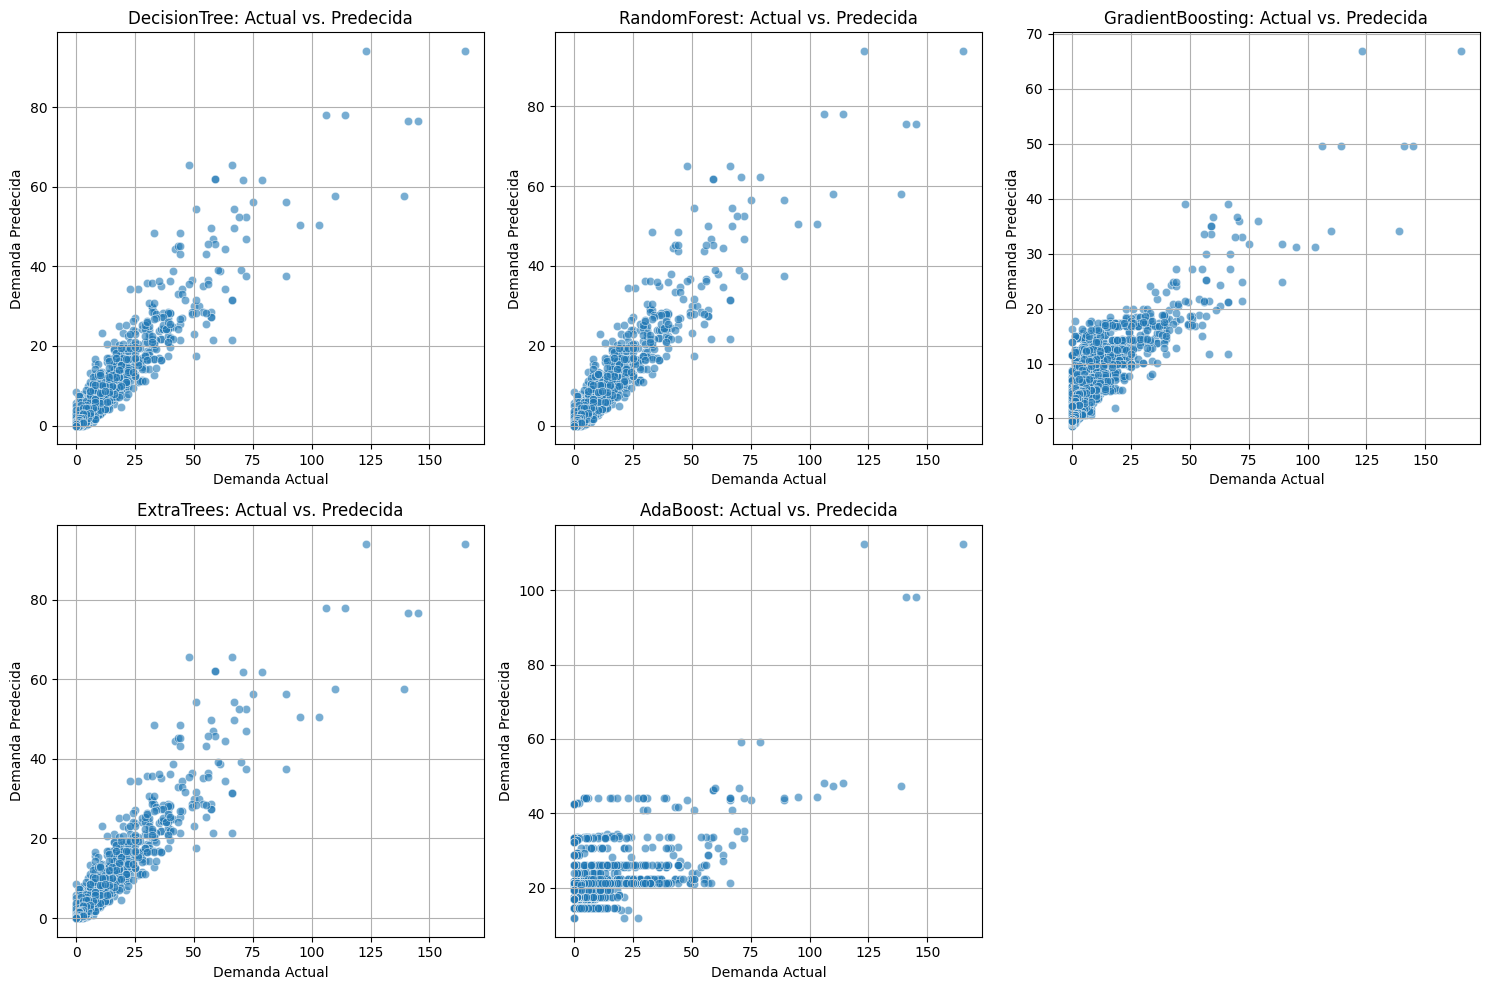

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualizacion
df_test_viz = df_long[df_long['año'] >= 2023].copy()
for name, model in models.items():
    df_test_viz[f'pred_{name}'] = model.predict(X_test)

plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items()):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=y_test, y=df_test_viz[f'pred_{name}'], alpha=0.6)
    plt.title(f'{name}: Actual vs. Predecida')
    plt.xlabel('Demanda Actual')
    plt.ylabel('Demanda Predecida')
    plt.grid(True)
plt.tight_layout()
plt.show()



## 9. Conclusiones

La práctica demostró que los modelos de regresión basados en árboles de decisión pueden predecir con precisión la demanda de atención en salud mental cuando se dispone de una serie de tiempo real. DecisionTree, RandomForest y ExtraTrees obtuvieron R² > 0.79, lo que indica que explican el 79% de la varianza en los años de prueba (2023–2024). Este resultado permite a las autoridades de salud mental planificar recursos con base empírica, priorizando entidades y grupos con mayor carga asistencial. La transformación del dataset de formato ancho a largo fue crucial para habilitar el modelado de series de tiempo, y la división cronológica del conjunto garantizó la validez del análisis predictivo.